In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Data points
X = np.array([[4, 1], [4, -1], [6, 0], [1, 0], [0, 1], [0, -1]])
y = np.array([1, 1, 1, -1, -1, -1])

# Fit linear SVM with a very large C to approximate hard-margin
clf = SVC(kernel='linear', C=1e6)
clf.fit(X, y)

# Extract model parameters
w = clf.coef_[0]
b = clf.intercept_[0]

# Compute decision boundary and margins
xx = np.linspace(-1, 7, 500)
yy = -(w[0] * xx + b) / w[1]

# Margin offset: distance = 1/||w||
margin = 1 / np.linalg.norm(w)
yy_down = yy - np.sqrt(1 + (w[0] / w[1])**2) * margin
yy_up   = yy + np.sqrt(1 + (w[0] / w[1])**2) * margin

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', marker='o', label='Positive class')
plt.scatter(X[y == -1, 0], X[y == -1, 1], c='red', marker='s', label='Negative class')
plt.plot(xx, yy, 'k-', label='Decision boundary')
plt.plot(xx, yy_down, 'k--', label='Margin lines')
plt.plot(xx, yy_up, 'k--')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Optimal Hyperplane and Margins')
plt.grid(True)
plt.show()

# Print hyperplane equation
print(f"Hyperplane: {w[0]:.3f}x + {w[1]:.3f}y + ({b:.3f}) = 0")
print(f"Margin on each side: {margin:.3f}")


In [ ]:
import pandas as pd

# Load both datasets
iris_df = pd.read_csv("/content/iris.csv")
# 1. IRIS DATASET - SVM with RBF and Linear Kernels
X_iris = iris_df.drop("species", axis=1)
y_iris = iris_df["species"]

# Encode labels
le_iris = LabelEncoder()
y_iris_encoded = le_iris.fit_transform(y_iris)

# Split dataset
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris_encoded, test_size=0.2, random_state=42)

# Train models
svm_rbf = SVC(kernel='rbf')
svm_linear = SVC(kernel='linear')

svm_rbf.fit(X_train_iris, y_train_iris)
svm_linear.fit(X_train_iris, y_train_iris)

# Predictions
y_pred_rbf = svm_rbf.predict(X_test_iris)
y_pred_linear = svm_linear.predict(X_test_iris)
# Accuracy and Confusion Matrix
acc_rbf = accuracy_score(y_test_iris, y_pred_rbf)
acc_linear = accuracy_score(y_test_iris, y_pred_linear)
cm_rbf = confusion_matrix(y_test_iris, y_pred_rbf)
cm_linear = confusion_matrix(y_test_iris, y_pred_linear)


In [ ]:
# Load dataset
letter_df = pd.read_csv("/content/letter-recognition.csv")  # Update path if needed
letter_df['letter'] = LabelEncoder().fit_transform(letter_df['letter'])

# Split features and labels
X = letter_df.drop('letter', axis=1)
y = letter_df['letter']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM
svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
y_prob = svm.predict_proba(X_test)

# Accuracy and Confusion Matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC and AUC (one-vs-rest)
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve
plt.figure(figsize=(10, 7))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-class ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [1]:
# svm_sklearn.py

import pandas as pd
from sklearn.datasets import load_wine
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load dataset (replace with pd.read_csv if using external CSV)
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM model (linear or RBF kernel)
model = SVC(kernel='rbf')  # or 'linear', 'poly', etc.
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[14  0  0]
 [ 0 11  3]
 [ 0  4  4]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.73      0.79      0.76        14
           2       0.57      0.50      0.53         8

    accuracy                           0.81        36
   macro avg       0.77      0.76      0.76        36
weighted avg       0.80      0.81      0.80        36


Accuracy Score: 0.8055555555555556


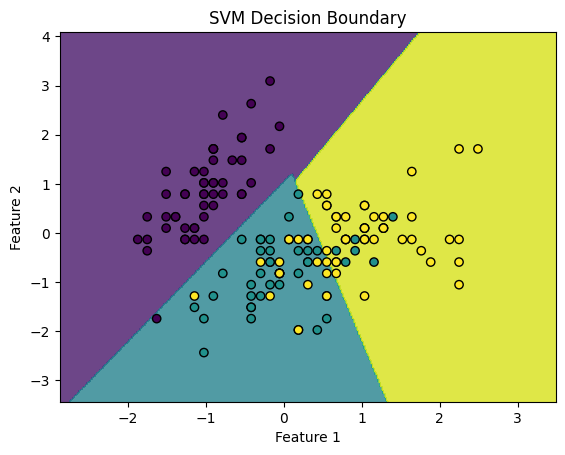

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# Use 2 features from Iris for visualization
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

# Scale and fit
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = SVC(kernel='linear')
model.fit(X_scaled, y)

# Plot decision boundaries
import numpy as np

h = .02
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("SVM Decision Boundary")
plt.show()
